In [6]:
%matplotlib inline
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
file_paths = glob.glob("./data/*")
print(file_paths)

['./data/20200319_seating.csv', './data/20200319_not_seating.csv']


In [3]:
category =np.empty((0,1), float)
rssi =np.empty((0,100), float)

for file in file_paths:
    d = np.loadtxt(file, delimiter=',')
    category_tmp, rssi_tmp = np.hsplit(d, [1])
    rssi = np.concatenate([rssi, rssi_tmp], axis=0)
    category = np.concatenate([category, category_tmp], axis=0)

rssi = rssi * (-1) / 128
category = tf.keras.utils.to_categorical(category, 2)

rssi_train, rssi_test, category_train, category_test = train_test_split(rssi, category, test_size=0.4)
print(rssi_train)
print(category_train)

#train_data = tf.data.Dataset.from_tensor_slices((rssi_train, category_train))
#print(train_data)

[[0.3359375 0.3671875 0.4296875 ... 0.359375  0.421875  0.421875 ]
 [0.40625   0.3984375 0.359375  ... 0.390625  0.3359375 0.3359375]
 [0.4140625 0.3359375 0.3359375 ... 0.359375  0.3828125 0.3671875]
 ...
 [0.34375   0.375     0.375     ... 0.46875   0.34375   0.34375  ]
 [0.3359375 0.3359375 0.375     ... 0.4375    0.328125  0.390625 ]
 [0.328125  0.3671875 0.3125    ... 0.3671875 0.328125  0.3515625]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.

In [4]:
# モデルを作成
model = models.Sequential()
model.add(layers.Dense(64, input_shape=(100, ), activation='relu'))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.3))
model.add(layers.Dense(2, activation='softmax'))

# サマリーを出力
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                6464      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 8,610
Trainable params: 8,610
Non-trainable params: 0
_________________________________________________________________


Train on 306 samples, validate on 204 samples
Epoch 1/10
306/306 [==============================] - 1s 3ms/sample - loss: 0.7718 - accuracy: 0.2712 - val_loss: 0.5686 - val_accuracy: 0.8431
Epoch 2/10
306/306 [==============================] - 0s 117us/sample - loss: 0.5409 - accuracy: 0.8137 - val_loss: 0.4295 - val_accuracy: 0.8431
Epoch 3/10
306/306 [==============================] - 0s 129us/sample - loss: 0.4548 - accuracy: 0.8137 - val_loss: 0.4103 - val_accuracy: 0.8431
Epoch 4/10
306/306 [==============================] - 0s 115us/sample - loss: 0.4681 - accuracy: 0.8137 - val_loss: 0.4202 - val_accuracy: 0.8431
Epoch 5/10
306/306 [==============================] - 0s 107us/sample - loss: 0.4826 - accuracy: 0.8137 - val_loss: 0.4193 - val_accuracy: 0.8431
Epoch 6/10
306/306 [==============================] - 0s 117us/sample - loss: 0.4782 - accuracy: 0.8137 - val_loss: 0.4116 - val_accuracy: 0.8431
Epoch 7/10
306/306 [==============================] - 0s 109us/sample - loss: 0.

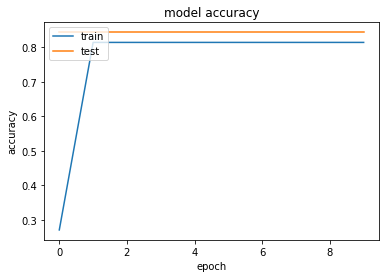

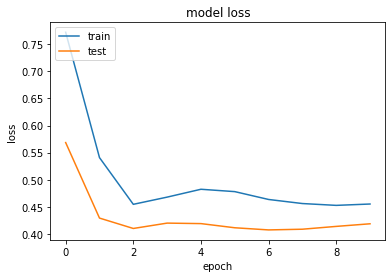

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit(rssi_train, category_train,
                    batch_size=128,
                    epochs=10,
                    #verbose=1,
                    validation_data=(rssi_test, category_test))

#正答率
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()